In [1]:
import pandas as pd
import numpy as np
import matplotlib
#指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
import matplotlib.pyplot as plt

In [2]:
train_tr=pd.read_csv(r"D:\DA_competition\DC\data\transaction_train.csv")
train_tag=pd.read_csv(r"D:\DA_competition\DC\data\tag_train.csv")

In [3]:
#表连接
train_tr=pd.merge(train_tr,train_tag,on="UID",how="left")

In [4]:
#查看基本信息
#查看空值数量、分别属于0、1的空值数量
#操作表
train_op_info=pd.DataFrame()
train_op_info["样本数"]=train_op.apply(lambda x:len(x),axis=0)
train_op_info["空值数"]=train_op.apply(lambda x:len(x[x.isnull()]),axis=0)
train_op_info["空值占比"]=train_op_info["空值数"]/len(train_op)

train_op_info["0的个数"]=train_op[train_op["Tag"]==0].apply(lambda x:len(x),axis=0)
train_op_info["0的空值数"]=train_op[train_op["Tag"]==0].apply(lambda x:len(x[x.isnull()]),axis=0)
train_op_info["0空值占比"]=train_op_info["0的空值数"]/len(train_op[train_op["Tag"]==0])

train_op_info["1的个数"]=train_op[train_op["Tag"]==1].apply(lambda x:len(x),axis=0)
train_op_info["1的空值数"]=train_op[train_op["Tag"]==1].apply(lambda x:len(x[x.isnull()]),axis=0)
train_op_info["1空值占比"]=train_op_info["1的空值数"]/len(train_op[train_op["Tag"]==1])

train_op_info["属性值类别数"]=train_op.apply(lambda x:len(x.value_counts()),axis=0)
train_op_info["0的属性值类别数"]=train_op[train_op["Tag"]==0].apply(lambda x:len(x.value_counts()),axis=0)
train_op_info["1的属性值类别数"]=train_op[train_op["Tag"]==1].apply(lambda x:len(x.value_counts()),axis=0)


In [44]:
train_op_info

,样本数,空值数,空值占比,0的个数,0的空值数,0空值占比,1的个数,1的空值数,1空值占比,属性值类别数,0的属性值类别数,1的属性值类别数
UID,1460843,0,0.000000,1306338,0,0.000000,154505,0,0.000000,29728,25451,4277
day,1460843,0,0.000000,1306338,0,0.000000,154505,0,0.000000,30,30,30
mode,1460843,0,0.000000,1306338,0,0.000000,154505,0,0.000000,89,87,60
success,1460843,101080,0.069193,1306338,76558,0.058605,154505,24522,0.158713,2,2,2
time,1460843,0,0.000000,1306338,0,0.000000,154505,0,0.000000,80670,79878,53047
os,1460843,0,0.000000,1306338,0,0.000000,154505,0,0.000000,7,6,7
version,1460843,252114,0.172581,1306338,220054,0.168451,154505,32060,0.207501,38,36,15
device1,1460843,251426,0.172110,1306338,219396,0.167947,154505,32030,0.207307,2421,2209,305
device2,1460843,428261,0.293160,1306338,358343,0.274311,154505,69918,0.452529,1652,1478,707
device_code1,1460843,413000,0.282713,1306338,348220,0.266562,154505,64780,0.419274,26184,23974,2308


In [6]:
#对每个属性进行分析

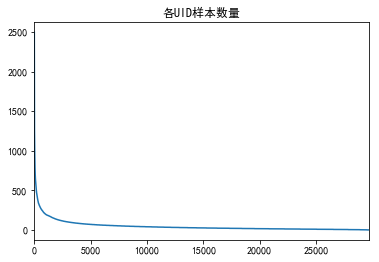

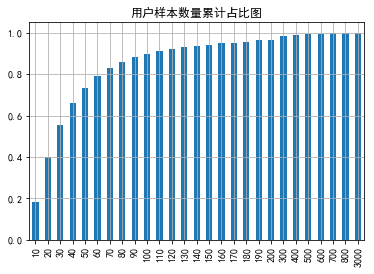

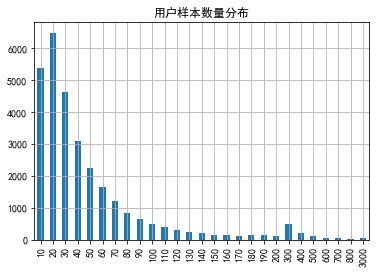

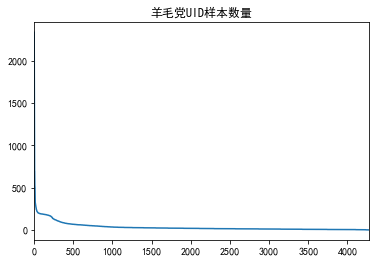

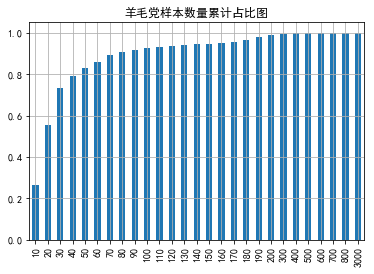

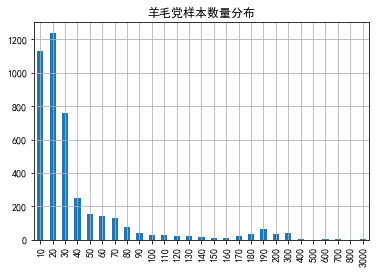

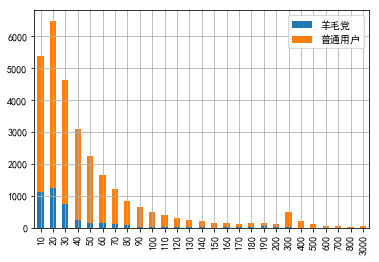

In [7]:
#UID
vc=train_op.UID.value_counts()
vc.reset_index(drop=True).plot(title="各UID样本数量")
plt.show()

#统计一下分布在各个数量段内的用户数
index=list(range(10,201,10))
index.extend(list(range(300,801,100)))
index.append(3000)
values=[len(vc[vc.values<=x]) for x in index]

values_sum=pd.Series(values,index=index)/len(vc)
values_sum.plot(title="用户样本数量累计占比图",kind='bar',grid=True)
plt.show()
for i in range(len(values)-1,0,-1):
    values[i]=values[i]-values[i-1]
vc_an=pd.Series(values,index=[str(x) for x in index])
vc_an.plot(title="用户样本数量分布",kind='bar',grid=True)
plt.show()

#用户样本数量分布羊毛党占比
values_1=[]
vc_1=train_op[train_op.Tag==1].UID.value_counts()
vc_1.reset_index(drop=True).plot(title="羊毛党UID样本数量")
plt.show()

values_1=[len(vc_1[vc_1.values<=x]) for x in index]
values_sum_1=pd.Series(values_1,index=index)/len(vc_1)
values_sum_1.plot(title="羊毛党样本数量累计占比图",kind='bar',grid=True)
plt.show()

for i in range(len(values_1)-1,0,-1):
    values_1[i]=values_1[i]-values_1[i-1]
vc_an_1=pd.Series(values_1,index=[str(x) for x in index])
vc_an_1.plot(title="羊毛党样本数量分布",kind='bar',grid=True)
plt.show()

vc_ratio=pd.concat([vc_an_1,vc_an],axis=1)
vc_ratio.columns=["羊毛党","普通用户"]
vc_ratio["普通用户"]=vc_ratio["普通用户"]-vc_ratio["羊毛党"]
vc_ratio.plot(kind='bar',stacked=True,grid=True)
plt.show()


In [8]:
print("全部用户的样本数量描述：\n",vc.describe())
print("羊毛党用户的样本数量描述:\n",vc_1.describe())
print("全部用户的样本数量中位数：\n",vc.median())
print("羊毛党用户的样本数量中位数：\n",vc_1.median())


全部用户的样本数量描述：
 count    29728.000000
mean        49.140305
std         85.467113
min          1.000000
25%         13.000000
50%         26.000000
75%         53.000000
max       2499.000000
Name: UID, dtype: float64
羊毛党用户的样本数量描述:
 count    4277.000000
mean       36.124620
std        75.294381
min         1.000000
25%        10.000000
50%        18.000000
75%        32.000000
max      2337.000000
Name: UID, dtype: float64
全部用户的样本数量中位数：
 26.0
羊毛党用户的样本数量中位数：
 18.0


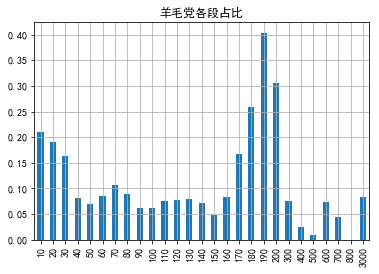

In [9]:
y_ratio=vc_an_1/vc_an
y_ratio.plot(kind='bar',grid=True,title="羊毛党各段占比")
plt.show()

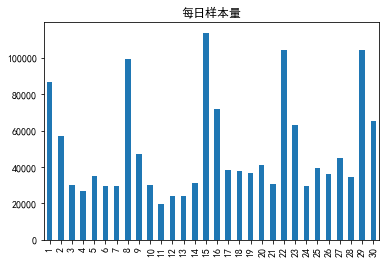

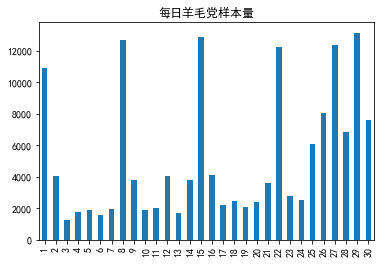

In [10]:
#day
train_op.day.value_counts().sort_index().plot(kind='bar',title="每日样本量")
plt.show()
train_op[train_op.Tag==1].day.value_counts().sort_index().plot(kind='bar',title="每日羊毛党样本量")
plt.show()
#1、8、15、22、29为周六
#2、9、16、23、30为周日
#其余为周一至周五

全部用户活跃日期分布方差均值： 17.22264533422955
0用户活跃日期分布方差均值： 17.263796082866747
羊毛党活跃日期分布方差均值： 16.97777095883401


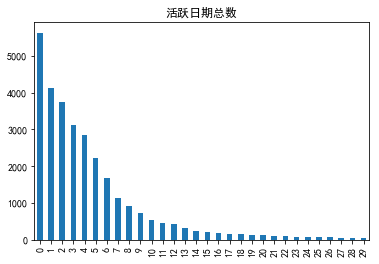

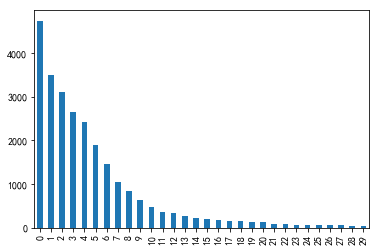

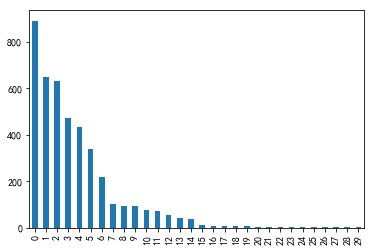

In [11]:
day_unique_all=train_op.groupby("UID").day.unique()
day_unique_1=train_op[train_op.Tag==1].groupby("UID").day.unique()
day_unique_0=train_op[train_op.Tag==0].groupby("UID").day.unique()

print("全部用户活跃日期分布方差均值：",day_unique_all.apply(lambda x:x.mean()).mean())
print("0用户活跃日期分布方差均值：",day_unique_0.apply(lambda x:x.mean()).mean())
print("羊毛党活跃日期分布方差均值：",day_unique_1.apply(lambda x:x.mean()).mean())
day_unique_all.apply(lambda x:len(x)).value_counts().plot(kind='bar',use_index=False,title="活跃日期总数")
plt.show()
day_unique_0.apply(lambda x:len(x)).value_counts().plot(kind='bar',use_index=False)
plt.show()
day_unique_1.apply(lambda x:len(x)).value_counts().plot(kind='bar',use_index=False)
plt.show()

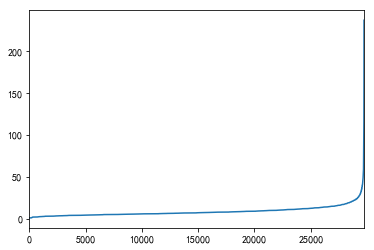

8.626039088007637


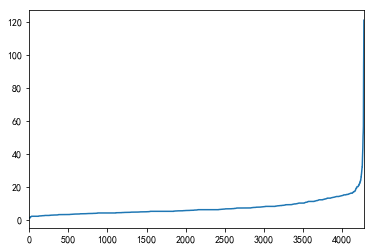

7.1621293941896464


In [12]:
(vc.sort_index()/day_unique_all.apply(lambda x:len(x))).sort_values().plot(use_index=False)
plt.show()
print((vc.sort_index()/day_unique_all.apply(lambda x:len(x))).mean())
(vc_1.sort_index()/day_unique_1.apply(lambda x:len(x))).sort_values().plot(use_index=False)
plt.show()
print((vc_1.sort_index()/day_unique_1.apply(lambda x:len(x))).mean())

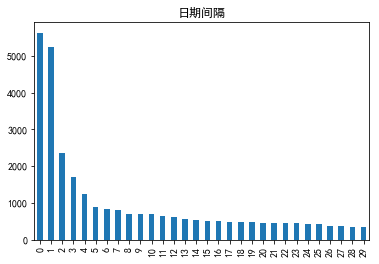

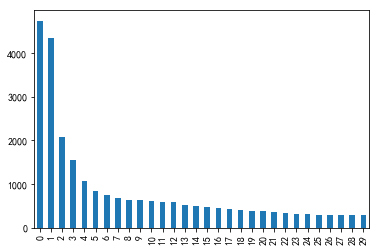

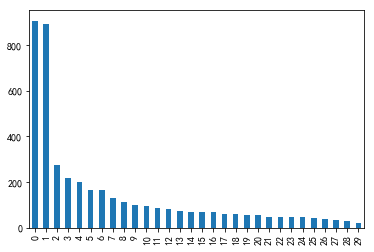

In [13]:
day_unique_all.apply(lambda x:x.max()-x.min()).value_counts().plot(kind='bar',use_index=False,title="日期间隔")
plt.show()
day_unique_0.apply(lambda x:x.max()-x.min()).value_counts().plot(kind='bar',use_index=False)
plt.show()
day_unique_1.apply(lambda x:x.max()-x.min()).value_counts().plot(kind='bar',use_index=False)
plt.show()

                    mode
c8741ce15ceac2a4  800059
d25caee90b27fa9b  184574
79f8b86938180c3c   82435
b501fa4fc58206b9   59132
acfaded7e04e7ba0   51041
072eee5c88d380df   27494
3b02bcd4b685d7a8   24008
00094ae2a1d62504   22750
963bd8a75ff9ab37   22169
20a91b45ef8f8221   20231
e1d2fad8ffdc66b3   18631
cd75f033b0488ace   17608
1c341176507fbd9b   11892
2f3e878175e34d9c   11824
cca82161b59127c1   11401
6b2aa6745680f08a   10648
bf79b3647c0878eb    9993
d21cae2b73884a8d    7735
479617cd802ed152    7346
08017d2cb28c2348    5100
e806d126013b42d1    4801
09080b31b40d57e8    4209
ac63e881c4e19402    3769
6440f87037199039    3272
37031ef728f5c886    3184
9c69742a831d6214    2799
dd06c9d2ea0a3750    2788
4c3d45ed38eefb7a    2782
745961ec187394cd    2758
8c7ce5ff939e66d1    2703
495eeb98eb9b73b8    2504
270ca3ca8f0d1126    2219
b0d4cd119fbef366    1813
fc147276b8ff76fb    1504
4b55abf363c83025    1503
33518cc0c2151469    1493
b668e42707ee9c7b    1447
cc273b0b2a2afb0f    1346
a96a05783c922913    1313


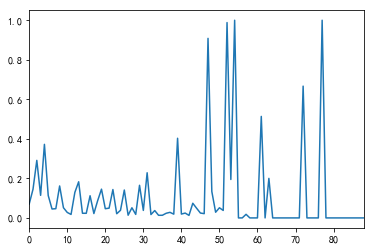

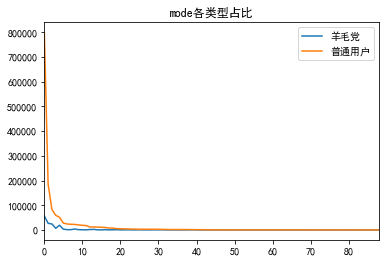

In [14]:
#mode
op_mode_count=pd.DataFrame(train_op["mode"].value_counts())
#显示所有行
pd.set_option('display.max_rows', 100)
print(op_mode_count)
op_mode_count=pd.merge(pd.DataFrame(train_op[train_op.Tag==1]["mode"].value_counts()),op_mode_count,how="right",left_index=True,right_index=True)
op_mode_count.fillna(0,inplace=True)
op_mode_count.columns=["羊毛党","普通用户"]
(op_mode_count["羊毛党"]/op_mode_count["普通用户"]).plot(use_index=False)
plt.show()
op_mode_count.plot(title="mode各类型占比",use_index=False)
plt.show()

In [21]:
print("全部用户数值分布：\n",train_op.success.value_counts(),"\nnull",len(train_op[train_op.success.isnull()]))
print("羊毛党数值分布：\n",train_op[train_op.Tag==1].success.value_counts(),"\nnull",len(train_op[(train_op.Tag==1)&(train_op.success.isnull())]))

全部用户数值分布：
 1.0    1288920
0.0      70843
Name: success, dtype: int64 
null 101080
羊毛党数值分布：
 1.0    124676
0.0      5307
Name: success, dtype: int64 
null 24522


In [26]:
#操作时间点time
import datetime as dt
train_op["hour"]=train_op.time.apply(lambda x:x.split(":")[0])


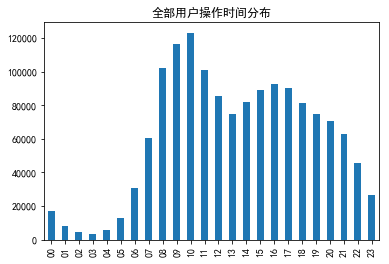

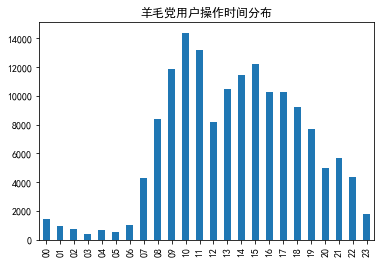

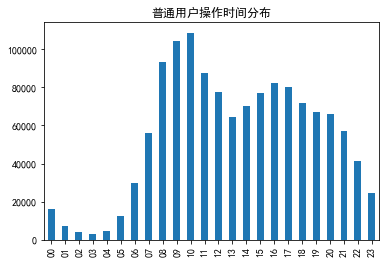

In [27]:
train_op["hour"].value_counts().sort_index().plot(kind='bar',title="全部用户操作时间分布")
plt.show()
train_op[train_op.Tag==1]["hour"].value_counts().sort_index().plot(kind='bar',title="羊毛党用户操作时间分布")
plt.show()
train_op[train_op.Tag==0]["hour"].value_counts().sort_index().plot(kind='bar',title="普通用户操作时间分布")
plt.show()

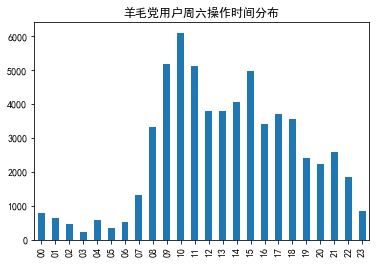

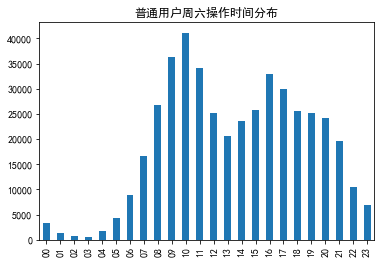

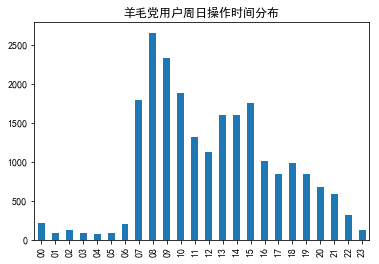

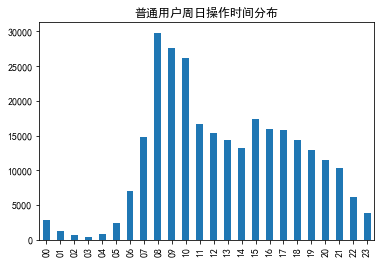

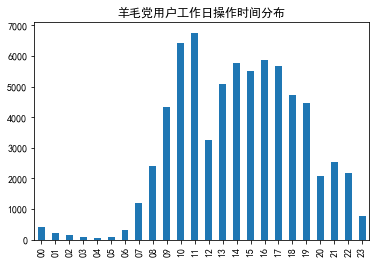

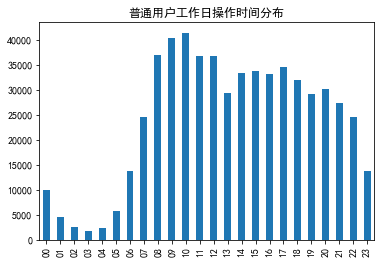

In [30]:
#查看羊毛党周六周日和普通用户周六周日有什么区别
#1、8、15、22、29为周六
#2、9、16、23、30为周日
train_op[(train_op.Tag==1)&(train_op.day.isin([1,8,15,22,29]))]["hour"].value_counts().sort_index().plot(kind='bar',title="羊毛党用户周六操作时间分布")
plt.show()
train_op[(train_op.Tag==0)&(train_op.day.isin([1,8,15,22,29]))]["hour"].value_counts().sort_index().plot(kind='bar',title="普通用户周六操作时间分布")
plt.show()
train_op[(train_op.Tag==1)&(train_op.day.isin([2,9,16,23,30]))]["hour"].value_counts().sort_index().plot(kind='bar',title="羊毛党用户周日操作时间分布")
plt.show()
train_op[(train_op.Tag==0)&(train_op.day.isin([2,9,16,23,30]))]["hour"].value_counts().sort_index().plot(kind='bar',title="普通用户周日操作时间分布")
plt.show()
train_op[(train_op.Tag==1)&(~train_op.day.isin([1,8,15,22,29,2,9,16,23,30]))]["hour"].value_counts().sort_index().plot(kind='bar',title="羊毛党用户工作日操作时间分布")
plt.show()
train_op[(train_op.Tag==0)&(~train_op.day.isin([1,8,15,22,29,2,9,16,23,30]))]["hour"].value_counts().sort_index().plot(kind='bar',title="普通用户工作日操作时间分布")
plt.show()

In [50]:
#os
os_count=pd.DataFrame(train_op.os.value_counts())
os_count=pd.merge(os_count,pd.DataFrame(train_op[train_op.Tag==0].os.value_counts()),how="left",left_index=True,right_index=True)
os_count=pd.merge(os_count,pd.DataFrame(train_op[train_op.Tag==1].os.value_counts()),how="left",left_index=True,right_index=True)
os_count.columns=["全部用户","普通用户","羊毛党"]
os_count

,全部用户,普通用户,羊毛党
102,1050731,960714.0,90017
200,240978,210380.0,30598
103,159508,127007.0,32501
101,8168,6851.0,1317
104,964,898.0,66
107,490,488.0,2
105,4,NaN,4


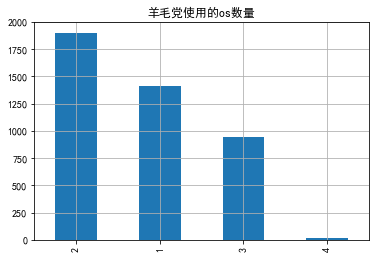

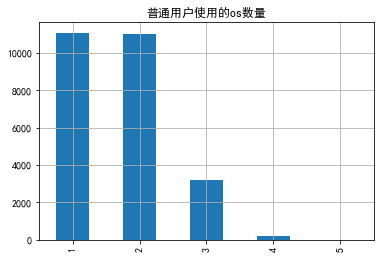

In [63]:
#看看羊毛党的os数量和普通用户的os数量的区别
os_ana=train_op[["UID","os","Tag"]].drop_duplicates()
len(os_ana[os_ana.Tag==1])/len(os_ana[os_ana.Tag==1].UID.unique())
len(os_ana[os_ana.Tag==0])/len(os_ana[os_ana.Tag==0].UID.unique())
os_ana[os_ana.Tag==1].groupby("UID").apply(lambda x :len(x)).value_counts().plot(kind='bar',title='羊毛党使用的os数量',grid=True)
plt.show()
os_ana[os_ana.Tag==0].groupby("UID").apply(lambda x :len(x)).value_counts().plot(kind='bar',title='普通用户使用的os数量',grid=True)
plt.show()

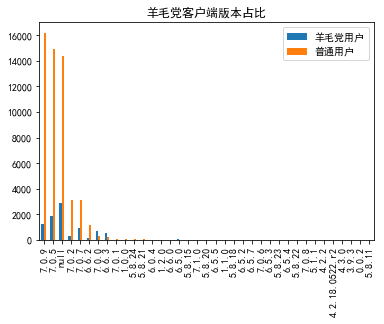

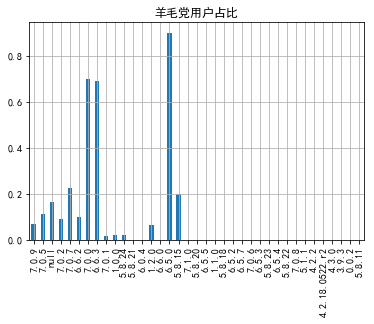

In [88]:
#客户端版本号version
version_ana=train_op[["UID","version","Tag"]].drop_duplicates()
version_count=pd.DataFrame(version_ana[version_ana.Tag==1].version.fillna("null").value_counts())
version_count=pd.merge(version_count,pd.DataFrame(version_ana[version_ana.Tag==0].version.fillna("null").value_counts()),how="right",left_index=True,right_index=True)
version_count.columns=["羊毛党用户","普通用户"]
version_count.fillna(0,inplace=True)
version_count.plot(kind='bar',title='羊毛党客户端版本占比')
plt.show()
(version_count["羊毛党用户"]/(version_count["普通用户"]+version_count["羊毛党用户"])).plot(grid=True,kind='bar',title='羊毛党用户占比')
plt.show()

In [99]:
#device1和device2
import re
device_ana=train_op[["UID","device1","device2","Tag"]].drop_duplicates()
device_ana[device_ana.Tag==1].device2.apply(lambda x:re.split(" |-",str(x))[0]).value_counts()
device_ana[device_ana.Tag==0].device2.apply(lambda x:re.split(" |-",str(x))[0]).value_counts()


nan          7138
IPHONE       2230
VIVO          393
SM            374
OPPO          325
MI            275
HM            166
HUAWEI         88
REDMI          62
ZTE            49
LENOVO         34
IPAD           33
COOLPAD        33
BF_T18         32
BND            28
GT             25
HISENSE        22
IPHONE9,3      22
PACM00         20
SCL            20
NUOFEI         18
IPHONE9,4      18
CAM            17
DIG            17
MIX            16
SOP            16
MYA            16
FRD            15
M681C          13
KINGSUN        13
LE             13
STF            12
KIW            12
DLI            12
ONEPLUS        12
WP             12
HTC            11
M3             11
NX511J         11
BLN            11
CHM            10
M5             10
JMM            10
NEM             9
CUN             8
PRA             8
OWWO            8
TRT             7
XT1581          7
HWI             6
             ... 
2014011         1
HLJ             1
GALAXY          1
X9007           1
A51KC     

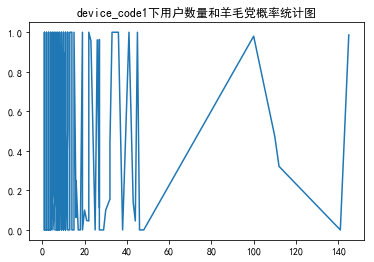

,dcode1下用户,用户为羊毛党概率
0,23904,0.214608
c50faf7eba139d67,145,0.986207
68cab16ebab00a7f,141,0.000000
8e10dd8c89e2c5b2,112,0.321429
1104a97782d1c405,110,0.472727
144d7a1dfba19310,100,0.980000
503404927b455a33,48,0.000000
a271a6b89bb30657,46,0.000000
d6cd86edf96c7895,45,1.000000
75414d9ee615a86f,44,0.045455


In [176]:
#device_code1、device_code2、device_code3

#存在多个用户对应同一个android标识,这类用户应该都是羊毛党
#print(train_op.device_code1.value_counts())
device_code_ana=train_op[["UID","device_code1","device_code2","device_code3","Tag"]].drop_duplicates()
device_code_ana.device_code1.value_counts()
#device_code_ana[device_code_ana.device_code1=="dee5c1a648f5b563"].Tag.value_counts()
device_code_ana[device_code_ana.Tag==1].groupby("UID").device_code1.unique().apply(lambda x:len(x)).mean()
#同一个device_code可以对应多个用户，这类用户都是羊毛党强特！！
#同样同一个用户可以对应多个device_code
device_code_ana.device_code2.value_counts()
device_code_ana[device_code_ana.device_code2=="94030d2293111b76"].Tag.value_counts()

code1=pd.DataFrame(device_code_ana.fillna(0).device_code1.value_counts())
code1=pd.merge(code1,pd.DataFrame(device_code_ana.fillna(0).groupby("device_code1").Tag.apply(lambda x:len(x[x==1])/len(x))),how="left",left_index=True,right_index=True)
code1.columns=["dcode1下用户","用户为羊毛党概率"]
plt.plot(code1.iloc[1:,0],code1.iloc[1:,1])
plt.title("device_code1下用户数量和羊毛党概率统计图")
plt.show()
code1

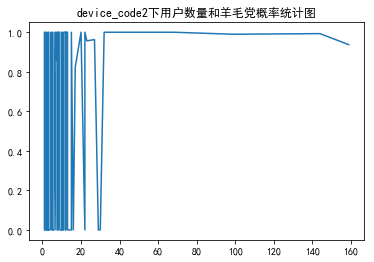

,dcode2下用户,用户为羊毛党概率
0,25635,0.216930
4f5108bdf3f9bcd9,159,0.937107
483ddc3a31666b8f,144,0.993056
59dcb10df09acd30,99,0.989899
5c608641915a5f76,68,1.000000
442e7c4eb41ca12c,41,1.000000
318a0c4081640f5a,41,1.000000
892c0cdc1e15901e,36,1.000000
cbef0d7db55d5cd8,32,1.000000
c3bacb4c90445849,30,0.000000


In [175]:
code2=pd.DataFrame(device_code_ana.fillna(0).device_code2.value_counts())
code2=pd.merge(code2,pd.DataFrame(device_code_ana.fillna(0).groupby("device_code2").Tag.apply(lambda x:len(x[x==1])/len(x))),how="left",left_index=True,right_index=True)
code2.columns=["dcode2下用户","用户为羊毛党概率"]
plt.plot(code2.iloc[1:,0],code2.iloc[1:,1])
plt.title("device_code2下用户数量和羊毛党概率统计图")
plt.show()
code2

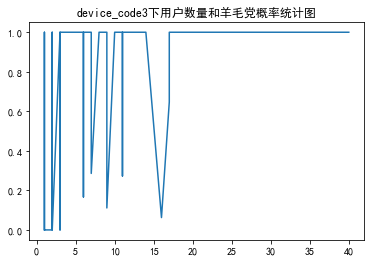

,dcode3下用户,用户为羊毛党概率
0,53467,0.120055
14c09cc8ce23d46c,872,0.037844
0d1884730db15ddc,40,1.000000
a127a0905331fdf9,33,1.000000
819a5173912a1236,17,1.000000
7a141ea8588d2d60,17,0.647059
9aecd507ce2b80ac,16,0.062500
6d746d4508d73369,14,1.000000
276e33faeaed9066,13,1.000000
2d89ba631a77cbd7,11,1.000000


In [178]:
code3=pd.DataFrame(device_code_ana.fillna(0).device_code3.value_counts())
code3=pd.merge(code3,pd.DataFrame(device_code_ana.fillna(0).groupby("device_code3").Tag.apply(lambda x:len(x[x==1])/len(x))),how="left",left_index=True,right_index=True)
code3.columns=["dcode3下用户","用户为羊毛党概率"]
plt.plot(code3.iloc[2:,0],code3.iloc[2:,1])
plt.title("device_code3下用户数量和羊毛党概率统计图")
plt.show()
code3

In [147]:
#可见device_code里面是有噪声的，不能直接拿来用
#print(device_code_ana[device_code_ana.device_code3=="14c09cc8ce23d46c"])

print("当三个code全不为空值：\n",device_code_ana[(~device_code_ana.device_code1.isnull())&
                                        (~device_code_ana.device_code2.isnull())&
                                        (~device_code_ana.device_code3.isnull())].Tag.value_counts())
print("当只有第一个code为空值：\n",device_code_ana[(device_code_ana.device_code1.isnull())&
                                         (~device_code_ana.device_code2.isnull())&
                                         (~device_code_ana.device_code3.isnull())].Tag.value_counts())
print("当只有第二个code为空值：\n",device_code_ana[(~device_code_ana.device_code1.isnull())&
                                         (device_code_ana.device_code2.isnull())&
                                         (~device_code_ana.device_code3.isnull())].Tag.value_counts())
print("当只有第三个code为空值：\n",device_code_ana[(~device_code_ana.device_code1.isnull())&
                                         (~device_code_ana.device_code2.isnull())&
                                         (device_code_ana.device_code3.isnull())].Tag.value_counts())
print("当1和2 code为空值：\n",device_code_ana[(device_code_ana.device_code1.isnull())&
                                         (device_code_ana.device_code2.isnull())&
                                         (~device_code_ana.device_code3.isnull())].Tag.value_counts())
print("当1和3 code为空值：\n",device_code_ana[(device_code_ana.device_code1.isnull())&
                                         (~device_code_ana.device_code2.isnull())&
                                         (device_code_ana.device_code3.isnull())].Tag.value_counts())

print("当2和3 code为空值：\n",device_code_ana[(~device_code_ana.device_code1.isnull())&
                                         (device_code_ana.device_code2.isnull())&
                                         (device_code_ana.device_code3.isnull())].Tag.value_counts())
print("当全为空值：\n",device_code_ana[(device_code_ana.device_code1.isnull())&
                                         (device_code_ana.device_code2.isnull())&
                                         (device_code_ana.device_code3.isnull())].Tag.value_counts())

当三个code全不为空值：
 0    813
1     30
Name: Tag, dtype: int64
当只有第一个code为空值：
 Series([], Name: Tag, dtype: int64)
当只有第二个code为空值：
 0    43
1     4
Name: Tag, dtype: int64
当只有第三个code为空值：
 0    31414
1     3135
Name: Tag, dtype: int64
当1和2 code为空值：
 0    4427
1    2274
Name: Tag, dtype: int64
当1和3 code为空值：
 0    30
1     1
Name: Tag, dtype: int64
当2和3 code为空值：
 0    1287
1     428
Name: Tag, dtype: int64
当全为空值：
 0    14317
1     2855
Name: Tag, dtype: int64


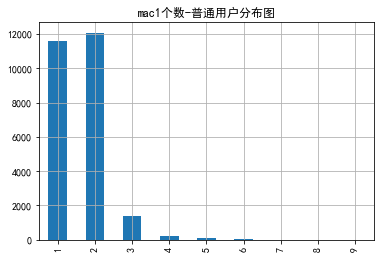

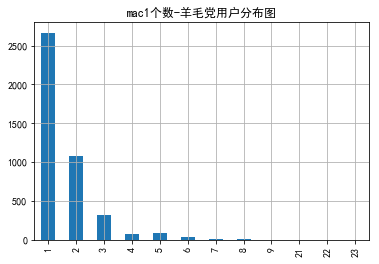

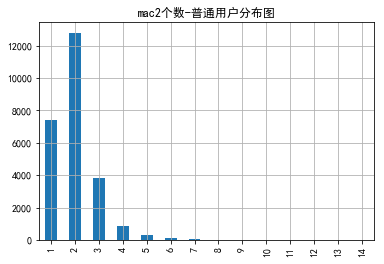

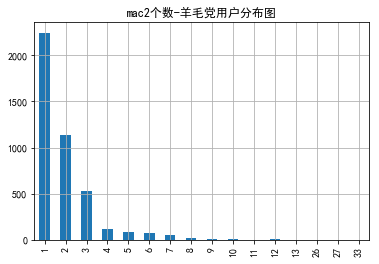

In [157]:
#mac1和mac2
mac_ana=train_op[["UID","mac1","mac2","Tag"]].drop_duplicates().fillna(0)
#查看同一个用户下对应着多少个mac1
mac_ana[mac_ana.Tag==0].groupby("UID").mac1.unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',grid=True,title="mac1个数-普通用户分布图")
plt.show()
mac_ana[mac_ana.Tag==1].groupby("UID").mac1.unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',grid=True,title="mac1个数-羊毛党用户分布图")
plt.show()
#查看同一个用户下对应着多少个mac2
mac_ana[mac_ana.Tag==0].groupby("UID").mac2.unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',grid=True,title="mac2个数-普通用户分布图")
plt.show()
mac_ana[mac_ana.Tag==1].groupby("UID").mac2.unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',grid=True,title="mac2个数-羊毛党用户分布图")
plt.show()
#以上没什么用


In [163]:
#查看同一mac1下的用户数量
mac_count=pd.DataFrame(mac_ana.groupby("mac1").UID.unique().apply(lambda x:len(x)).sort_values(ascending=False))
print(mac_count)
mac_count=mac_count.merge(pd.DataFrame(mac_ana.groupby("mac1")[["UID","Tag"]].
                          apply(lambda x:len(x.drop_duplicates()[x.drop_duplicates()["Tag"]==1])/len(x.drop_duplicates()))),how="left",left_index=True,right_index=True)
mac_count


                    UID
mac1                   
0                 29682
a8dc52f65085212e   5789
b910ea1cd2e10a1d    129
f3ee3ff10c23b820     82
25ad3858d08d4757     80
eae886a2b4f94b94     55
291f3d4d6a0c0cc1     39
573ee3dc510461f6     39
9f37a0e0ba9f639b     36
3d3d4263a9054ebb     28
48d6ef8000341c5d     26
97feab6f8153cd84     26
e1e19ab6cce9ee3e     24
3b7fef223f0b0025     23
f235c07461ba106d     22
de7aad82937c2164     22
d9c956462582af29     22
2c1d9e392db14e89     22
23cbf44f9368e43c     20
5a0ba922d8c85b2b     20
635aba1d53ec6ba4     19
566150f86dc15a28     18
781972737f3ca3e5     16
377f51d92afc294b     14
b1f92d4324c1ee16     12
a57eb5609a4ab978     12
e666a605ffc1171b     12
04f292f7f4f179b6     12
a854a451649eea21     12
898141a50e8dfad4     12
e13fd04cd07a9783     11
a7e53669f8a8fcaf     11
3e9e16379b6c248b     11
107909cc8a420f80     11
7a1488cff8a979be     11
76ed047fea3e8e96     11
f54a0058ee3de684     10
3b6baae64138b6ec     10
19d1ca3a8b1b0219     10
29120370460711ce

,UID,0
mac1,,
0,29682,0.143892
a8dc52f65085212e,5789,0.077906
b910ea1cd2e10a1d,129,0.992248
f3ee3ff10c23b820,82,0.926829
25ad3858d08d4757,80,0.987500
eae886a2b4f94b94,55,0.000000
291f3d4d6a0c0cc1,39,0.743590
573ee3dc510461f6,39,0.743590
9f37a0e0ba9f639b,36,1.000000


In [164]:
#查看同一mac2下的用户数量
mac2_count=pd.DataFrame(mac_ana.groupby("mac2").UID.unique().apply(lambda x:len(x)).sort_values(ascending=False))
print(mac2_count)
mac2_count=mac2_count.merge(pd.DataFrame(mac_ana.groupby("mac2")[["UID","Tag"]].
                          apply(lambda x:len(x.drop_duplicates()[x.drop_duplicates()["Tag"]==1])/len(x.drop_duplicates()))),how="left",left_index=True,right_index=True)
mac2_count

                    UID
mac2                   
0                 25473
a8dc52f65085212e   9716
3b34a667e4d2e60e   1711
b910ea1cd2e10a1d    144
25ad3858d08d4757    101
f3ee3ff10c23b820     88
656ccbeb6d97be58     58
21110ed2f6992470     56
5c958017593bb77b     55
468299cd65e117a9     43
6c8e9e55865cf666     39
573ee3dc510461f6     39
7b89d8ef44a8e152     35
cdb2a87cf541aa01     26
742db78155879c6d     26
4e76bd4cec2df63b     23
1e49ee277a1be75f     23
2c1d9e392db14e89     23
e751a8d70b4cc011     23
ce1ce739e81ac904     23
3988cd258c8771d2     22
237dfeebe6b2913d     22
6925198bc56db9ef     22
728738c3dca68267     22
c0d9119094e51024     20
03988af98490b233     20
eba7c3d0aeabe08f     19
2fd0bc0808da52b4     19
9b59f55129b36f51     18
d40f2bb7426ab695     17
166602c23b0bdd82     16
2c489d56b45b1cbd     16
ded4aed5f41075dc     15
1f1f50152f3274dc     14
aaa4a7ddc77f2159     14
26e2fca00093847c     14
f54a0058ee3de684     13
c157db0bb3f998b2     13
ad7987b1cc4da3a3     13
16fe24d1d1c0d310

,UID,0
mac2,,
0,25473,0.159227
a8dc52f65085212e,9716,0.057534
3b34a667e4d2e60e,1711,0.098188
b910ea1cd2e10a1d,144,0.993056
25ad3858d08d4757,101,0.980198
f3ee3ff10c23b820,88,0.920455
656ccbeb6d97be58,58,0.982759
21110ed2f6992470,56,0.946429
5c958017593bb77b,55,0.000000


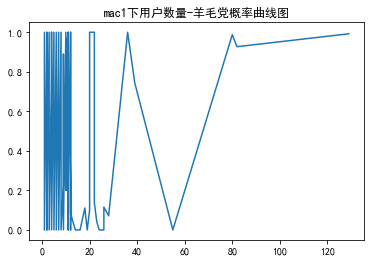

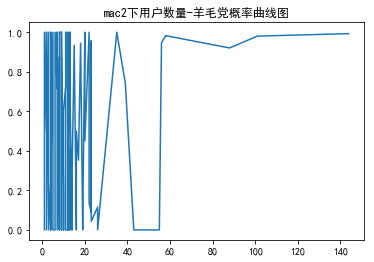

In [173]:
mac_count.columns=["用户数量","羊毛党概率"]
plt.plot(mac_count.iloc[2:,0],mac_count.iloc[2:,1])
plt.title("mac1下用户数量-羊毛党概率曲线图")
plt.show()
mac2_count.columns=["用户数量","羊毛党概率"]
plt.plot(mac2_count.iloc[3:,0],mac2_count.iloc[3:,1])
plt.title("mac2下用户数量-羊毛党概率曲线图")
plt.show()

In [181]:
#wifi
wifi_ana=train_op[["UID","wifi","Tag"]].drop_duplicates().fillna(0)

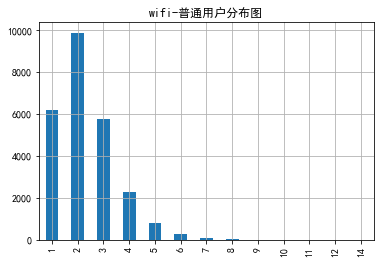

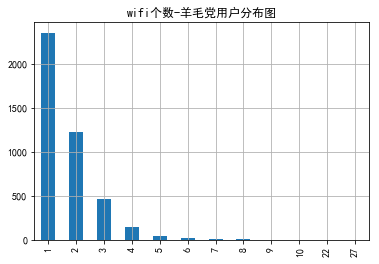

In [180]:
#查看同一个用户下对应着多少个wifi
wifi_ana[wifi_ana.Tag==0].groupby("UID").wifi.unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',grid=True,title="wifi-普通用户分布图")
plt.show()
wifi_ana[wifi_ana.Tag==1].groupby("UID").wifi.unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',grid=True,title="wifi个数-羊毛党用户分布图")
plt.show()

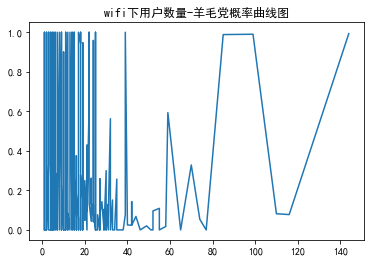

,用户数量,羊毛党概率
wifi,,
a3fd93fe06a59074,172,0.075581
6ec718bbccbaedd2,144,0.993056
2b170a64f5473601,116,0.077586
6945a7487de9d1cd,110,0.081818
2109917457c421d3,99,0.989899
bedb236bb4bcccba,85,0.988235
89efed0cc9374acf,77,0.000000
3d8a206e19c98381,74,0.054054
d2eb6cf107ce2484,70,0.328571


In [184]:
#查看同一wifi下的用户数量
wifi_count=pd.DataFrame(wifi_ana.groupby("wifi").UID.unique().apply(lambda x:len(x)).sort_values(ascending=False))
wifi_count=wifi_count.merge(pd.DataFrame(wifi_ana.groupby("wifi")[["UID","Tag"]].
                          apply(lambda x:len(x[x["Tag"]==1])/len(x))),how="left",left_index=True,right_index=True)
wifi_count.columns=["用户数量","羊毛党概率"]
plt.plot(wifi_count.iloc[1:,0],wifi_count.iloc[1:,1])
plt.title("wifi下用户数量-羊毛党概率曲线图")
plt.show()
wifi_count

In [185]:
#通过上面这些统计，会发现数据有很大的波动，比较数据为什么会有这么大的波动是关键


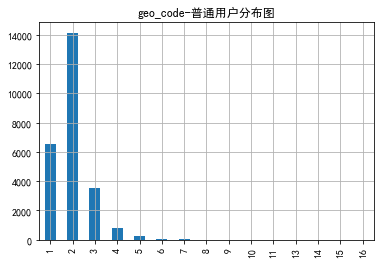

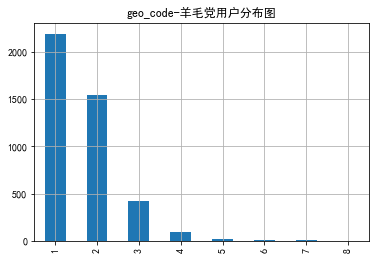

In [189]:
#geo_code
geo_ana=train_op[["UID","geo_code","Tag"]].drop_duplicates().fillna(0)
#查看同一个用户下对应着多少个wifi
geo_ana[geo_ana.Tag==0].groupby("UID").geo_code.unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',grid=True,title="geo_code-普通用户分布图")
plt.show()
geo_ana[geo_ana.Tag==1].groupby("UID").geo_code.unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',grid=True,title="geo_code-羊毛党用户分布图")
plt.show()

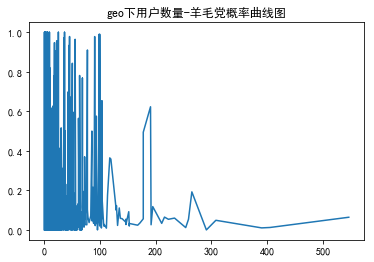

,用户数量,羊毛党概率
geo_code,,
0,23231,0.153287
wqq2,546,0.064103
wt7j,405,0.012346
wxkz,390,0.010256
wmgu,308,0.048701
wxsb,291,0.000000
ws0e,265,0.192453
wt5c,259,0.054054
wtfh,254,0.011811


In [191]:
#查看同一wifi下的用户数量
geo_count=pd.DataFrame(geo_ana.groupby("geo_code").UID.unique().apply(lambda x:len(x)).sort_values(ascending=False))
geo_count=geo_count.merge(pd.DataFrame(geo_ana.groupby("geo_code")[["UID","Tag"]].
                          apply(lambda x:len(x[x["Tag"]==1])/len(x))),how="left",left_index=True,right_index=True)
geo_count.columns=["用户数量","羊毛党概率"]
plt.plot(geo_count.iloc[1:,0],geo_count.iloc[1:,1])
plt.title("geo下用户数量-羊毛党概率曲线图")
plt.show()
geo_count

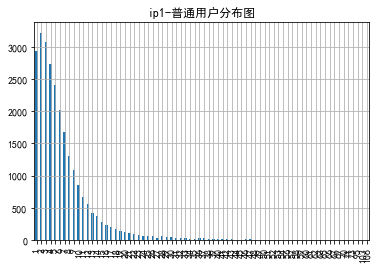

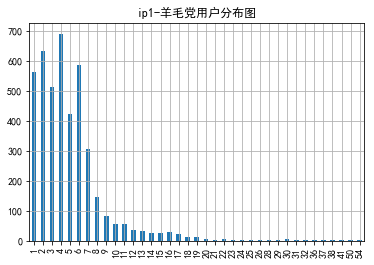

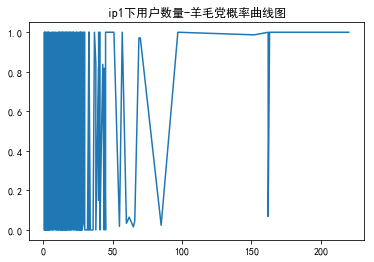

,用户数量,羊毛党概率
ip1,,
0,17583,0.106664
99533c7d37963762,220,1.000000
0fe293bea342665a,207,1.000000
329ad082dc996703,207,1.000000
8f10d8efe9372319,163,1.000000
38b3fc87783670bc,162,0.067901
8cc731ce206a9c63,162,1.000000
211d0e54f3da2e8d,152,0.986842
31e45421f33b64e4,97,1.000000


In [196]:
#ip1和ip2,ip1_sub和ip2_sub
ip_ana=train_op[["UID","ip1","ip2","ip1_sub","ip2_sub","Tag"]].drop_duplicates().fillna(0)
#查看同一个用户下对应着多少个ip1
ip_ana[ip_ana.Tag==0].groupby("UID").ip1.unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',grid=True,title="ip1-普通用户分布图")
plt.show()
ip_ana[ip_ana.Tag==1].groupby("UID").ip1.unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',grid=True,title="ip1-羊毛党用户分布图")
plt.show()

#查看同一ip1下的用户数量
ip1_count=pd.DataFrame(ip_ana.groupby("ip1").UID.unique().apply(lambda x:len(x)).sort_values(ascending=False))
ip1_count=ip1_count.merge(pd.DataFrame(ip_ana.groupby("ip1")[["UID","Tag"]].
                          apply(lambda x:len(x[x["Tag"]==1])/len(x))),how="left",left_index=True,right_index=True)
ip1_count.columns=["用户数量","羊毛党概率"]
plt.plot(ip1_count.iloc[1:,0],ip1_count.iloc[1:,1])
plt.title("ip1下用户数量-羊毛党概率曲线图")
plt.show()
ip1_count

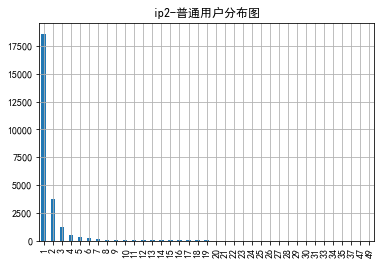

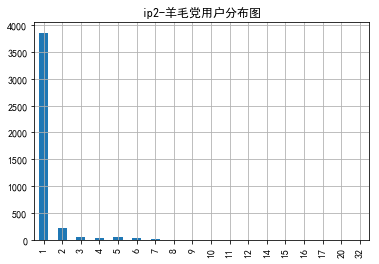

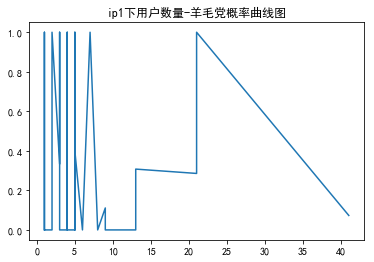

,用户数量,羊毛党概率
ip2,,
0,29724,0.111214
38b3fc87783670bc,41,0.073171
5777335f8759f4f4,21,1.000000
1cff430529049618,21,0.285714
5ca580562496078a,13,0.307692
ac9440b7bb2471f1,13,0.000000
b462bd2eeb081873,9,0.000000
717f0aa5f82f10b8,9,0.111111
666829313283dbc2,8,0.000000


In [198]:
#查看同一个用户下对应着多少个ip2
ip_ana[ip_ana.Tag==0].groupby("UID").ip2.unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',grid=True,title="ip2-普通用户分布图")
plt.show()
ip_ana[ip_ana.Tag==1].groupby("UID").ip2.unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',grid=True,title="ip2-羊毛党用户分布图")
plt.show()

#查看同一ip2下的用户数量
ip2_count=pd.DataFrame(ip_ana.groupby("ip2").UID.unique().apply(lambda x:len(x)).sort_values(ascending=False))
ip2_count=ip2_count.merge(pd.DataFrame(ip_ana.groupby("ip2")[["UID","Tag"]].
                          apply(lambda x:len(x[x["Tag"]==1])/len(x))),how="left",left_index=True,right_index=True)
ip2_count.columns=["用户数量","羊毛党概率"]
plt.plot(ip2_count.iloc[1:,0],ip2_count.iloc[1:,1])
plt.title("ip2下用户数量-羊毛党概率曲线图")
plt.show()
ip2_count

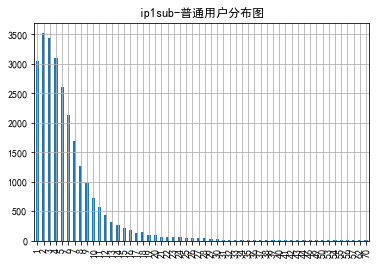

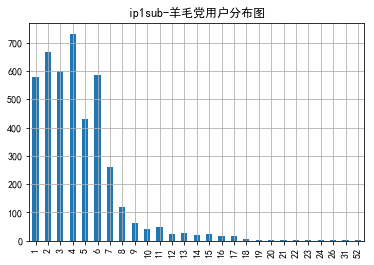

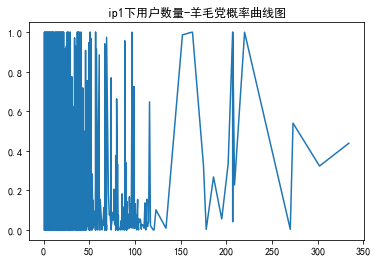

,用户数量,羊毛党概率
ip1_sub,,
0,17583,0.106664
7661c9041bbe683c,334,0.438272
ee2a277f07c7ac81,302,0.323276
94e0916180e8fcea,273,0.540052
5e251ecd7ab23a78,270,0.003236
72309d88abb9b916,220,1.000000
d8883ffc88c699b4,209,0.227586
d212bf8069071714,207,1.000000
8393a8ab6d3d7a17,207,0.042357


In [199]:
#查看同一个用户下对应着多少个ip1sub
ip_ana[ip_ana.Tag==0].groupby("UID").ip1_sub.unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',grid=True,title="ip1sub-普通用户分布图")
plt.show()
ip_ana[ip_ana.Tag==1].groupby("UID").ip1_sub.unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',grid=True,title="ip1sub-羊毛党用户分布图")
plt.show()

#查看同一ip1sub下的用户数量
ip1_sub_count=pd.DataFrame(ip_ana.groupby("ip1_sub").UID.unique().apply(lambda x:len(x)).sort_values(ascending=False))
ip1_sub_count=ip1_sub_count.merge(pd.DataFrame(ip_ana.groupby("ip1_sub")[["UID","Tag"]].
                          apply(lambda x:len(x[x["Tag"]==1])/len(x))),how="left",left_index=True,right_index=True)
ip1_sub_count.columns=["用户数量","羊毛党概率"]
plt.plot(ip1_sub_count.iloc[1:,0],ip1_sub_count.iloc[1:,1])
plt.title("ip1sub下用户数量-羊毛党概率曲线图")
plt.show()
ip1_sub_count

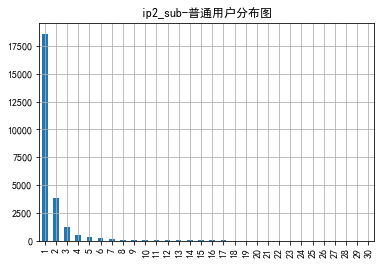

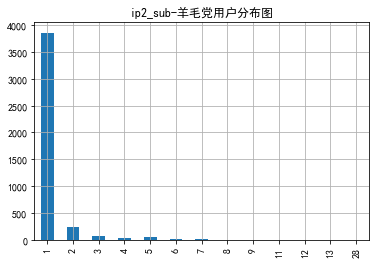

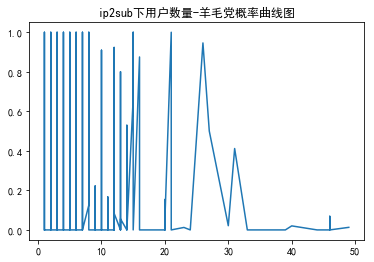

,用户数量,羊毛党概率
ip2_sub,,
0,29724,0.111214
ecd70f35df9c9770,49,0.012987
178bab340bda6aee,46,0.000000
afec34bd646ec2a4,46,0.068966
6027a7f30d161a29,46,0.000000
a9af48397a9241fe,44,0.000000
3e0ce9d755238f01,40,0.020408
77aa94e2b65e0d4e,39,0.000000
28d8941b7097a125,37,0.000000


In [200]:
#查看同一个用户下对应着多少个ip1sub
ip_ana[ip_ana.Tag==0].groupby("UID").ip2_sub.unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',grid=True,title="ip2_sub-普通用户分布图")
plt.show()
ip_ana[ip_ana.Tag==1].groupby("UID").ip2_sub.unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',grid=True,title="ip2_sub-羊毛党用户分布图")
plt.show()

#查看同一ip1sub下的用户数量
ip2_sub_count=pd.DataFrame(ip_ana.groupby("ip2_sub").UID.unique().apply(lambda x:len(x)).sort_values(ascending=False))
ip2_sub_count=ip2_sub_count.merge(pd.DataFrame(ip_ana.groupby("ip2_sub")[["UID","Tag"]].
                          apply(lambda x:len(x[x["Tag"]==1])/len(x))),how="left",left_index=True,right_index=True)
ip2_sub_count.columns=["用户数量","羊毛党概率"]
plt.plot(ip2_sub_count.iloc[1:,0],ip2_sub_count.iloc[1:,1])
plt.title("ip2sub下用户数量-羊毛党概率曲线图")
plt.show()
ip2_sub_count

In [209]:
print("ip1和ip2同时为空\n",train_op[(train_op.ip1.isnull())&(train_op.ip2.isnull())][["UID","Tag"]].drop_duplicates()["Tag"].value_counts())
print("ip1和ip2同时不为空\n",train_op[(~train_op.ip1.isnull())&(~train_op.ip2.isnull())][["UID","Tag"]].drop_duplicates()["Tag"].value_counts())
print("ip1为空\n",train_op[(train_op.ip1.isnull())&(~train_op.ip2.isnull())][["UID","Tag"]].drop_duplicates()["Tag"].value_counts())
print("ip2为空\n",train_op[(~train_op.ip1.isnull())&(train_op.ip2.isnull())][["UID","Tag"]].drop_duplicates()["Tag"].value_counts())

ip1和ip2同时为空
 0    11894
1     2748
Name: Tag, dtype: int64
ip1和ip2同时不为空
 0    96
1     2
Name: Tag, dtype: int64
ip1为空
 0    6811
1     419
Name: Tag, dtype: int64
ip2为空
 0    25418
1     4266
Name: Tag, dtype: int64
ip1和ip1_sub不同时为空
 Series([], Name: Tag, dtype: int64)


In [210]:
###################################Transaction############################################